<a href="https://colab.research.google.com/github/SuhasiniTatipalli/Sales-Prediction/blob/main/Sales_Predictions_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Import Libraries



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl


*   Loading & exploring data




In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stack1-week1-data/sales_predictions.csv')
df
corr = df.corr()

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# How many rows and columns?
df.shape

(8523, 12)

In [8]:
df[['Item_Identifier','Item_Weight']].head()

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
4,NCD19,8.93


In [9]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [10]:
df['Item_Weight'][0:10]

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [11]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



*   Cleaning & preparing data




In [12]:
#Are there duplicates? If so, drop any duplicates
df.duplicated().sum() #no duplicates

0

In [13]:
#Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)


Approach : Imputing the missing values based on simple imputation method using mean for Item_Weight by Item_Type. 

Outlet_Size is imputed based on Item_Outlet_Sales.

In [15]:
#Item_Weight 
Item_Weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(Item_Weight_mean, inplace=True)


In [16]:
 df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#Outlet_Size (need help)
#filter1 = (df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2')
#df[filter1]
#fix1=df.loc[filter1].fillna('High',inplace=True)
#df[fix1]
df['Outlet_Size'].fillna('Medium', inplace=True)



In [18]:
 #Confirm that there are no missing values after addressing them
 df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [22]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean) 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052




*   Exploratory Analysis



Histogram to view the distributions of various features in your dataset.

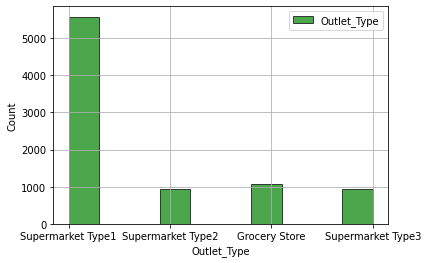

In [24]:
df['Outlet_Type'].hist(bins=10,alpha=0.7, color='green',label='Outlet_Type',edgecolor='black')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

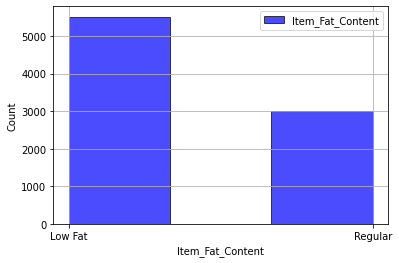

In [26]:
df['Item_Fat_Content'].hist(bins=3,alpha=0.7, color='blue',label='Item_Fat_Content',edgecolor='black')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.legend()
plt.show()

In [27]:
df['Item_Fat_Content'].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

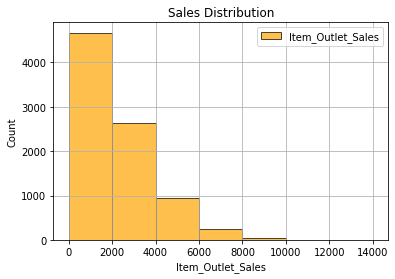

In [28]:
df['Item_Outlet_Sales'].hist(bins=[0,2000,4000,6000,8000,10000,12000,14000],alpha=0.7, color='orange',label='Item_Outlet_Sales',edgecolor='black')
plt.xlabel('Item_Outlet_Sales')
plt.xticks([0,2000,4000,6000,8000,10000,12000,14000])
plt.ylabel('Count')
plt.legend()
plt.title('Sales Distribution')
plt.show()

In [29]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

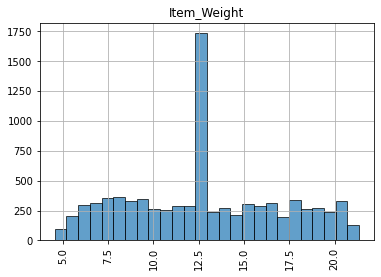

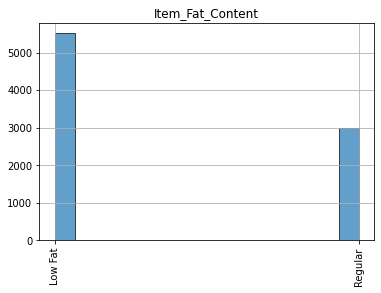

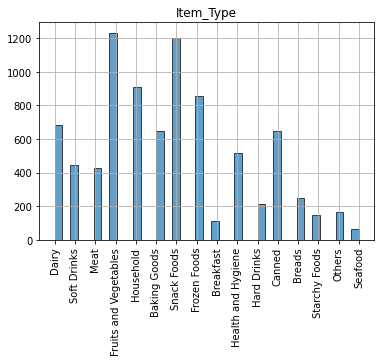

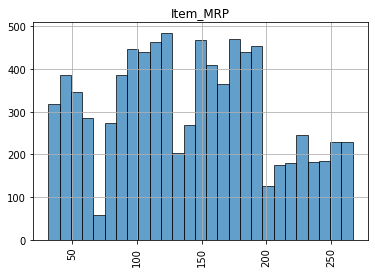

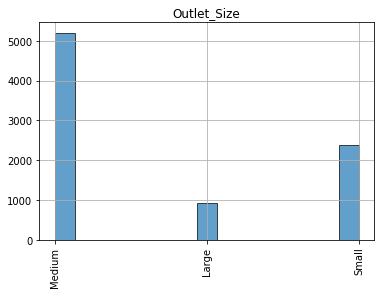

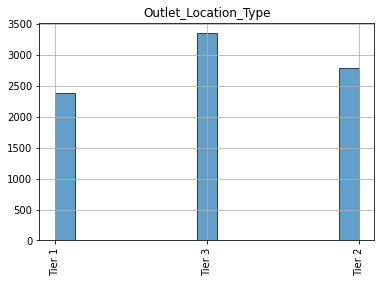

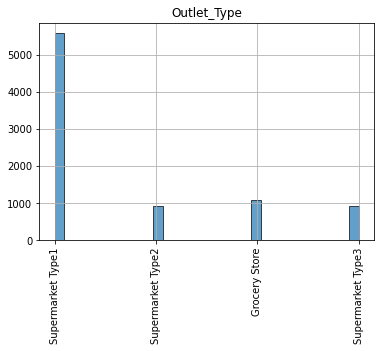

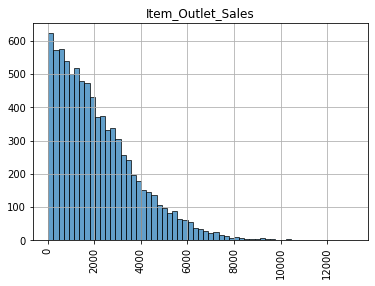

In [30]:
columns=['Item_Weight', 'Item_Fat_Content',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
for i in columns:
  df[i].hist(bins='auto',alpha=0.7, label=i,edgecolor='black')
  plt.title(i)
  plt.xticks(rotation='vertical')
  plt.show()

Boxplot to view statistical summaries of various features in your dataset.

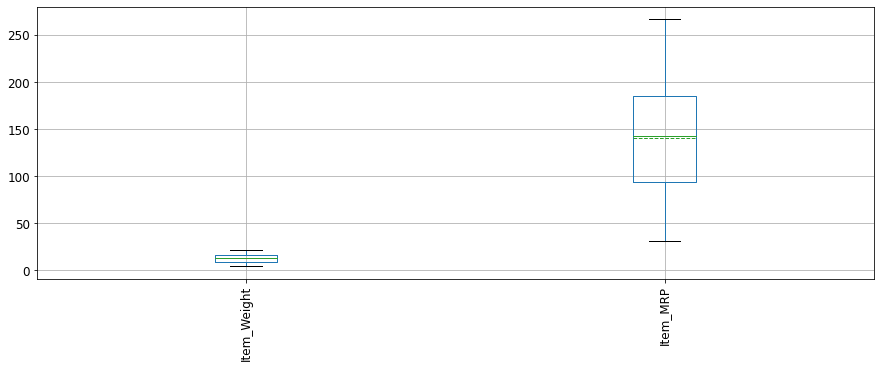

In [31]:
df.boxplot(['Item_Weight', 'Item_MRP']  # column or columns to plot
               , showmeans=True,meanline=True, # column to group by
               figsize = (15,5), # size of the figure
               fontsize = 12, # size of the text
               rot=90,# degree of rotation of the labels
               grid=True # turn off the grid
               ) # How else can you enhance this plot?
             
 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


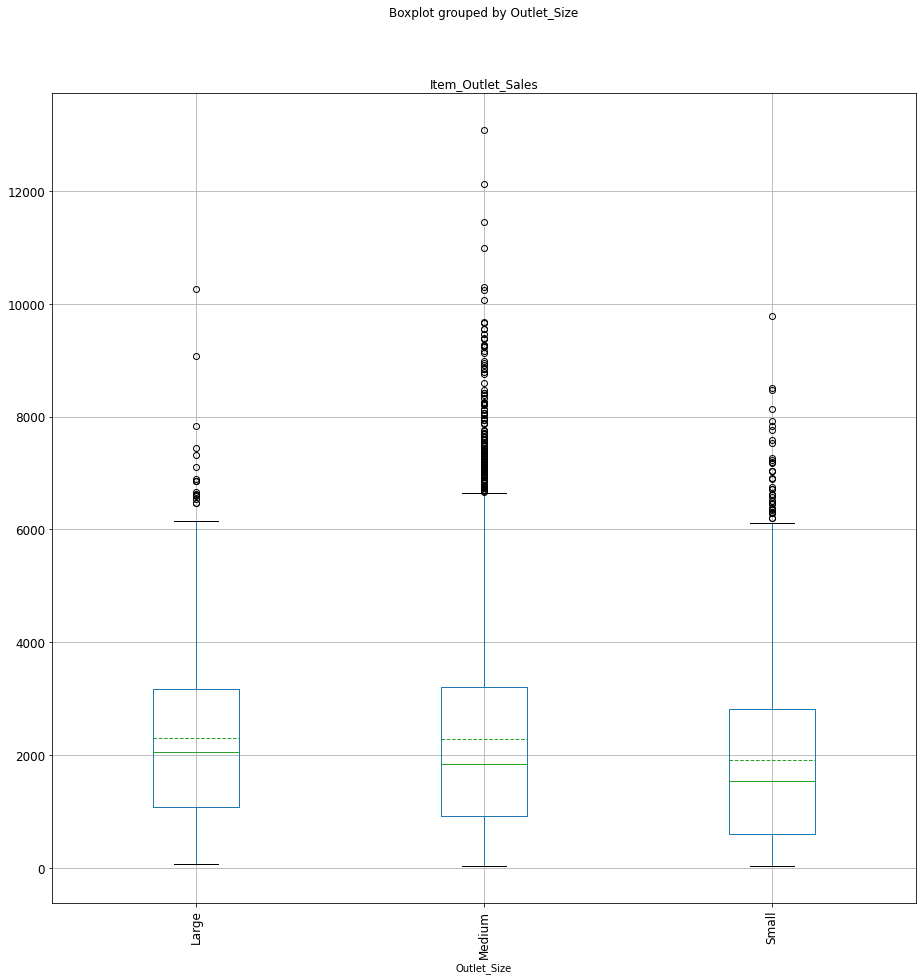

In [32]:
df.boxplot(['Item_Outlet_Sales'],  # column or columns to plot
               by = 'Outlet_Size',  # column or columns to plot
               showmeans=True,meanline=True, # column to group by
               figsize = (15,15), # size of the figure
               fontsize = 12, # size of the text
               rot=90,# degree of rotation of the labels
               grid=True # turn off the grid
               ) # How else can you enhance this plot?
             
 
plt.show()

Heatmap of the correlation between features.

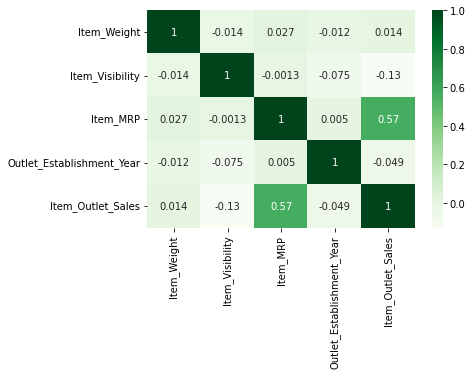

In [33]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

**explanatory data analysis**

Find out each item sales in different outlets

In [34]:
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    return f"${x*1e-3:,.0f}K"

In [35]:
hundred_k(1000000,0)

'$1,000K'

In [36]:
from matplotlib.ticker import FuncFormatter
price_fmt_100k = FuncFormatter(hundred_k)

In [37]:
price_fmt_100k(800000)

'$800K'

In [38]:
#sales_by_item = round(df.groupby (['Outlet_Type','Item_Type'],as_index=False)['Item_Outlet_Sales'].mean(),2)
#sales_by_item


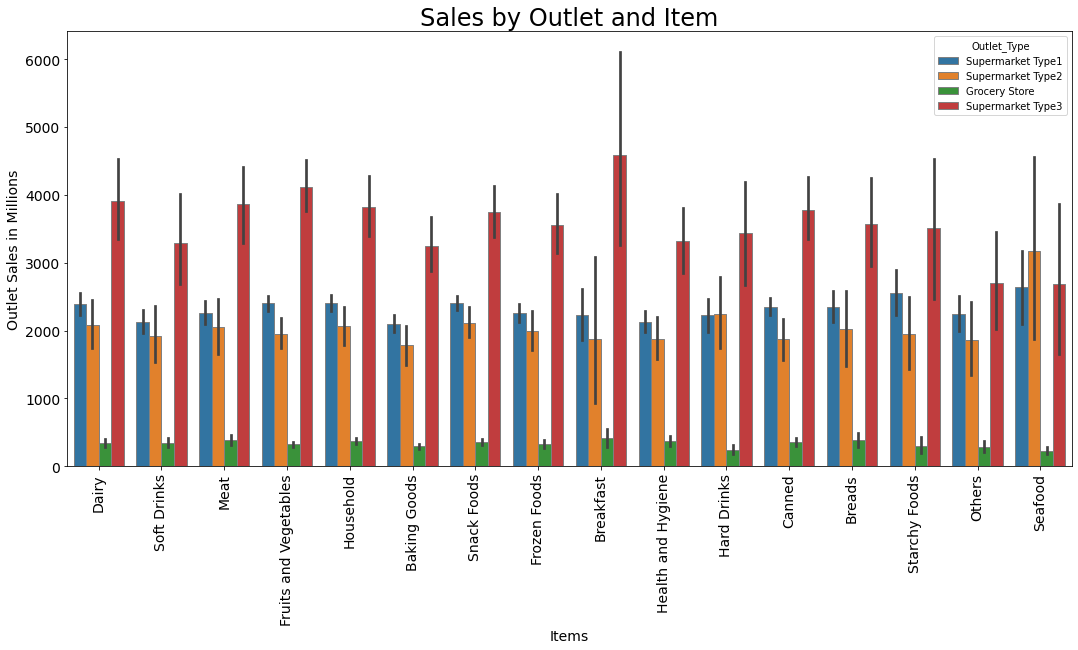

In [39]:
#barplot to show each item sales in different outlets
sns.barplot(data=df, x = 'Item_Type', y = 'Item_Outlet_Sales',hue = 'Outlet_Type', edgecolor=".5")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('Sales by Outlet and Item',fontsize=24)
plt.ylabel('Outlet Sales in Millions',fontsize=14)
plt.xlabel('Items',fontsize=14)
plt.tick_params(axis='both',labelsize=14)



*  The above bar graph shows that the Supermarket Type 3 sales are higher in all products compared to other outlets.
*  The fruites & vegetables, Breakfast salses are higher than the other items on the shelf.






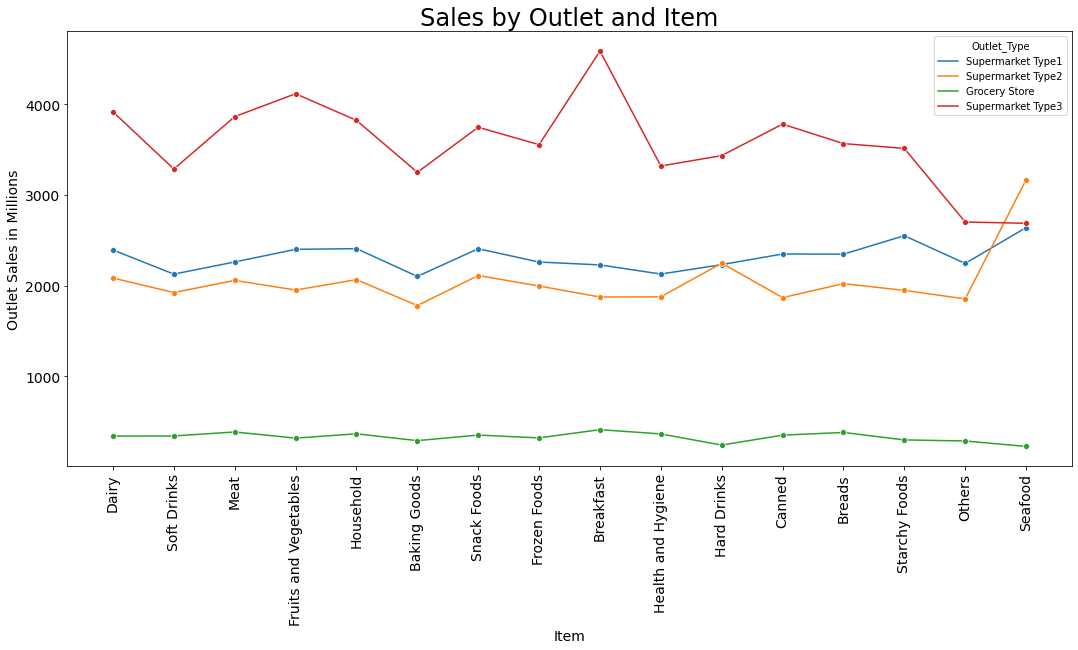

In [40]:
#Same as above in Lineplot
sns.lineplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales',ci = None, marker = 'o',hue = 'Outlet_Type')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('Sales by Outlet and Item',fontsize=24)
plt.ylabel('Outlet Sales in Millions',fontsize=14)
plt.xlabel('Item',fontsize=14)
plt.tick_params(axis='both',labelsize=14)


In [41]:
#distribution of item outlet sales
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}K"


def hist_plot_func(data,x='Item_Outlet_Sales',figsize=(10,5),format_price=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=data,x=x,ax=ax)
    ax.set_title('Distribution of Item Outlet Sales',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean_price = df[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = ${mean_price:,.2f}");

    med_price = df[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = ${med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    #plt.xticks(rotation=90)

    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    ## add a legend        
    ax.legend()

    return fig,ax

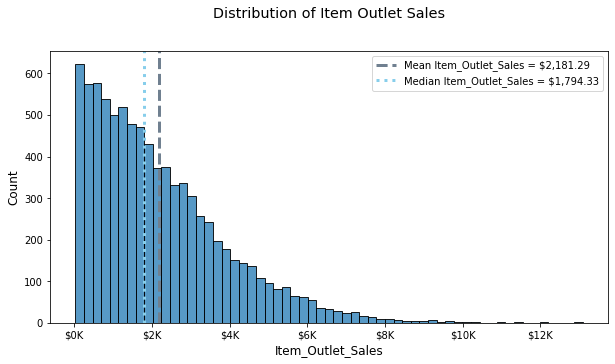

In [42]:
fig, ax = hist_plot_func(df)

The above histplot shows the distribution of outlet sales. Mean outlet sales = 2,181.29, Median outlet sales=1,794.33

In [43]:
#distribution of item outlet sales per item type
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x = 'Item_Type', y = 'Item_Outlet_Sales',figsize=(10,5),format_price=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.barplot(data=data,x=x,y=y,ax=ax)
    ax.set_title('Distribution of Item Outlet Sales',
                 fontsize='x-large',y=1.1);

 
    ## Annotating mean and median
   # mean_price = df[y].mean()
   # ax.axvline(mean_price,color='slategray', ls='--', lw=3,
    #        label=f"Mean {y} = ${mean_price:,.2f}");

   # med_price = df[y].median()
   # ax.axvline(med_price,color='skyblue', ls=':', lw=3,
   #         label=f"Median {y} = ${med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    plt.xticks(rotation=90)

    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.yaxis.set_major_formatter(price_fmt_100k)

    ## add a legend        
    ax.legend()

    return fig,ax

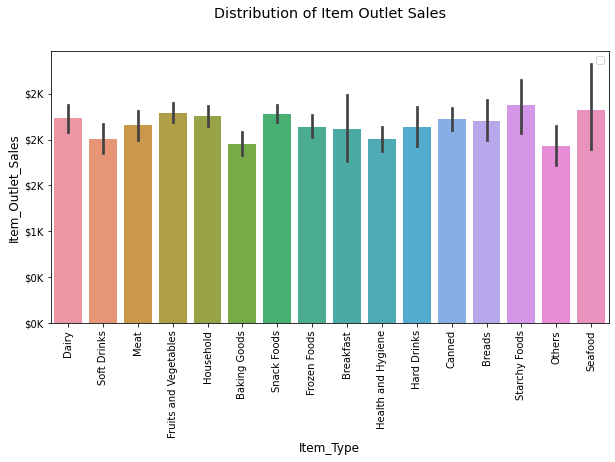

In [44]:
fig, ax = plot_dist(df)

the above barplot shows the total of all outlet sales per item

Average Outlet Sales per Outlet Type

In [45]:
#Calculate the unique Outlet_Identifiers
numberofoutlets_by_type = df.groupby(['Outlet_Type'])['Outlet_Identifier'].nunique()
numberofoutlets_by_type

Outlet_Type
Grocery Store        2
Supermarket Type1    6
Supermarket Type2    1
Supermarket Type3    1
Name: Outlet_Identifier, dtype: int64

In [46]:
#Calculated the total Item_Outlet_Sales by Outlet_Type
sales_by_outlet = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sales_by_outlet

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: Item_Outlet_Sales, dtype: float64

In [47]:
#Calculated the Average Outlet Sales
Average_Outlet_Sales=sales_by_outlet/numberofoutlets_by_type
Average_Outlet_Sales=Average_Outlet_Sales.reset_index()
Average_Outlet_Sales

,Outlet_Type,0
0,Grocery Store,1.840171e+05
1,Supermarket Type1,2.152890e+06
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


In [48]:
#Rename the above column '0' 
Average_Outlet_Sales.rename(columns={'Outlet_Type':'Outlet_Type',0:'Average_Sales'},inplace=True)
#Sort the Average_Sales
Average_Outlet_sort=Average_Outlet_Sales.sort_values(by='Average_Sales', ascending=False)
Average_Outlet_sort

,Outlet_Type,Average_Sales
3,Supermarket Type3,3.453926e+06
1,Supermarket Type1,2.152890e+06
2,Supermarket Type2,1.851823e+06
0,Grocery Store,1.840171e+05


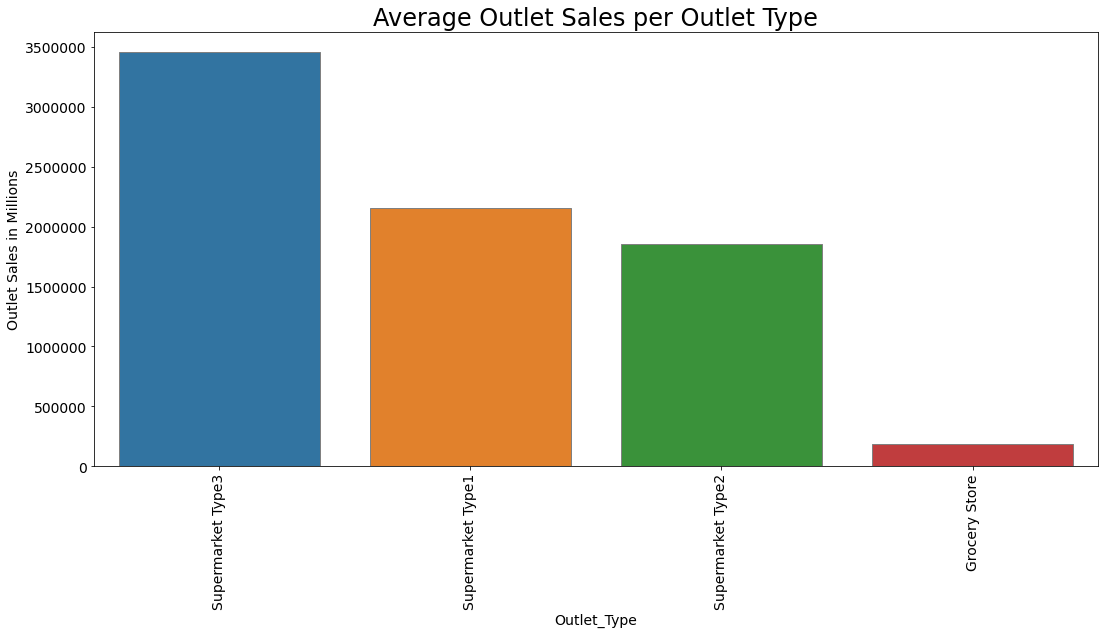

In [49]:
#barplot to show Average Outlet Sales per Outlet Type
sns.barplot(data=Average_Outlet_sort, x= 'Outlet_Type', y='Average_Sales',edgecolor=".5")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('Average Outlet Sales per Outlet Type',fontsize=24)
plt.ylabel('Outlet Sales in Millions',fontsize=14)
plt.xlabel('Outlet_Type',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')